In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import json

from agage_archive.io import read_agage, combine_datasets, read_ale_gage, Paths, scale_convert, create_dataset

paths = Paths()

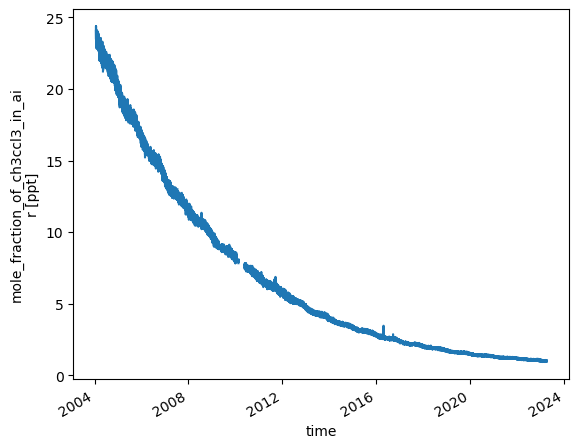

In [2]:
ds_agage = read_agage("CH3CCl3", "CGO", "GCMS-Medusa")
ds_agage.mf.plot()

In [3]:
ds_gage = read_ale_gage("CH3CCl3", "CGO", "GAGE")

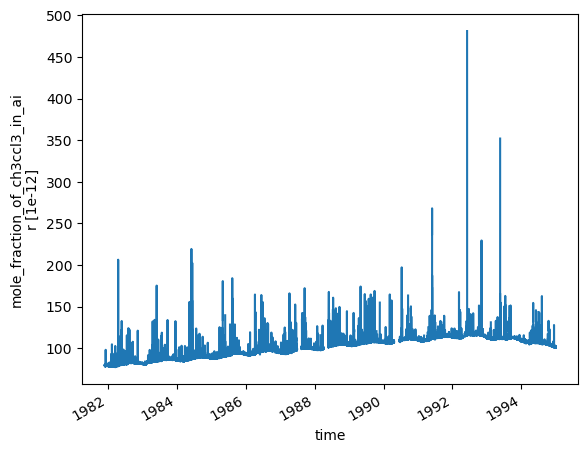

In [4]:
ds_gage.mf.plot()

In [5]:
ds = xr.concat([scale_convert(ds_gage, "SIO-05"),
                scale_convert(ds_agage, "SIO-05")], dim="time")

In [6]:
ds

<xarray.Dataset>
Dimensions:                   (time: 115553)
Coordinates:
  * time                      (time) datetime64[ns] 1981-11-30T13:01:00 ... 2...
Data variables:
    mf                        (time) float64 nan nan nan nan ... 1.011 nan nan
    mf_repeatability          (time) float64 nan nan nan nan ... 0.01572 nan nan
    inlet_height              (time) int64 70 70 70 70 70 70 ... 70 70 70 70 70
    data_flag                 (time) object 'U' 'U' 'U' 'U' 'U' ... 0 0 0 0 0
    integration_flag          (time) object 'H' 'H' 'H' 'H' 'H' ... 72 72 72 72
    run_time                  (time) datetime64[ns] NaT ... 2023-04-11T03:46:00
    git_pollution_flag        (time) float64 nan nan nan nan ... 0.0 0.0 0.0 0.0
    met_office_baseline_flag  (time) float64 nan nan nan nan ... 0.0 0.0 0.0 0.0
Attributes: (12/13)
    comment:                    GAGE CH3CCl3 data from Kennaook/Cape Grim, Ta...
    data_owner_email:           
    data_owner:                 
    station_long_name:          Kennaook/Cape Grim, Tasmania, Australia
    inlet_base_elevation_masl:  94.0
    inlet_latitude:             -40.683
    ...                         ...
    inlet_comment:              
    data_dir:                   
    species:                    ch3ccl3
    calibration_scale:          SIO-05
    units:                      1e-12
    file_created:               2023-06-29 12:08:12

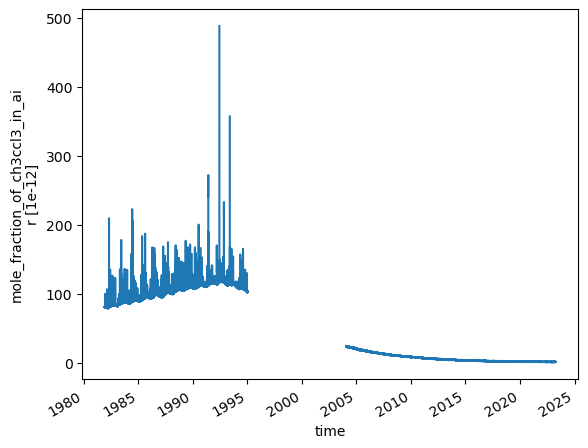

In [7]:
ds.mf.plot()

In [18]:
ds = combine_datasets("CH3CCl3", "CGO")

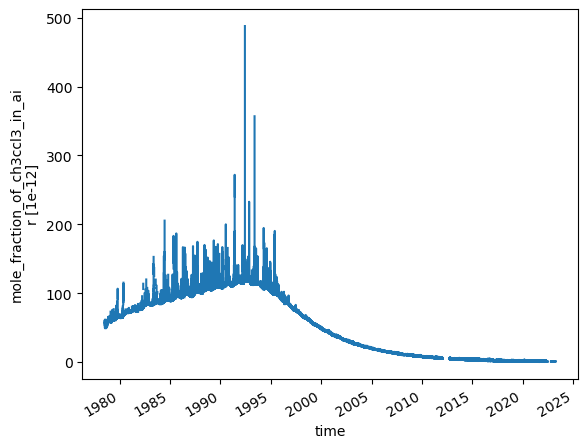

In [19]:
ds.mf.plot()

In [20]:
ds

<xarray.Dataset>
Dimensions:                   (time: 422484)
Coordinates:
  * time                      (time) datetime64[ns] 1978-07-08T05:08:00 ... 2...
Data variables:
    mf                        (time) float64 nan nan 60.44 60.44 ... nan nan nan
    mf_repeatability          (time) float64 nan nan 1.192 1.192 ... nan nan nan
    inlet_height              (time) int64 70 70 70 70 70 70 ... 70 70 70 70 70
    data_flag                 (time) object 'U' 'U' 'U' 'U' 'U' ... 0 0 0 0 0
    integration_flag          (time) object 'H' 'H' 'H' 'H' 'H' ... 0 72 0 0 0
    instrument                (time) <U11 'ALE' 'ALE' 'ALE' ... 'GCMD' 'GCMD'
    git_pollution_flag        (time) float64 nan nan nan nan ... 0.0 0.0 0.0 0.0
    met_office_baseline_flag  (time) float64 nan nan nan nan ... 0.0 0.0 0.0 0.0
    run_time                  (time) datetime64[ns] NaT NaT NaT ... NaT NaT NaT
Attributes: (12/13)
    comment:                    Combined AGAGE/GAGE/ALE dataset combined from...
    data_owner_email:           
    data_owner:                 
    station_long_name:          Kennaook/Cape Grim, Tasmania, Australia
    inlet_base_elevation_masl:  94.0
    inlet_latitude:             -40.683
    ...                         ...
    inlet_comment:              
    data_dir:                   
    species:                    ch3ccl3
    calibration_scale:          SIO-05
    units:                      1e-12
    file_created:               2023-06-29 12:16:25